
# Multifractional Brownian field

.. codeauthor:: Frédéric Richard <frederic.richard_at_univ-amu.fr>

In this example, we show how to simulate heterogeneous textures whose
roughness spatially varies. Such textures can be obtained by simulating a
turning band field with a space-dependent Hurst function.

Here, the Hurst function is defined at position
$(x, y)$ by the constant function

\begin{align}\beta_{(x,y)}(w) \equiv H_y = \left(\frac{y}{N}\right) h_0
        + \left(\frac{N-y}{N}\right) h_1,\end{align}

for some fixed values $h_0, h_1$. This leads to a texture whose
roughness linearly varies in the vertical direction. Such a simulation
was used for illustration and experiments in :cite:p:`Vu2020`.

<div class="alert alert-info"><h4>Note</h4><p>Such simulations are related to the so-called
  **multifractional Brownian field**
  which was defined :cite:p:`Benassi97,Peltier96`. In a harmonizable
  representation, these fields are of the form

  .. math::
      Z(x, y) = C_{x, y} \int_{\mathbb{R}^2}
      ( e^{i\langle (x, y), w \rangle} -1 )
      \vert w \vert^{-H_{x, y} -1}
      dW(w),

  where $dW$ stands for a complex Brownian measure.</p></div>


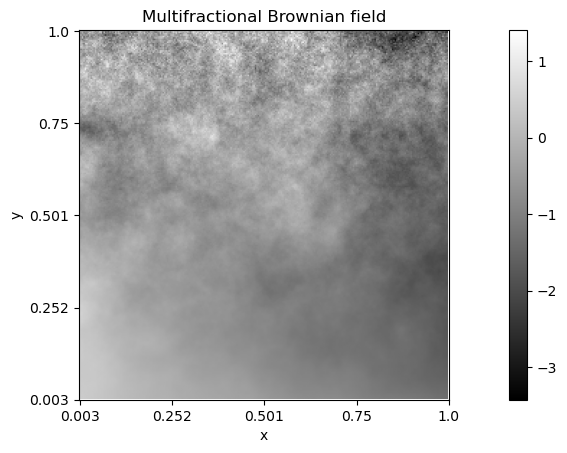

In [1]:
import numpy as np
from afbf import coordinates, sdata, tbfield

N = 256  # Image size.
h0 = 0.1  # Hurst index at (x, y) with y=0.
h1 = 0.9  # Hurst index at (x, y) with y=N-1.

# Define a fractional Brownian field.
Z = tbfield()

# Set coordinates.
coord = coordinates(N)  # field coordinates.
coordy = coordinates()  # subset of coordinates.
x = np.reshape(np.arange(1, N+1), (N, 1))

# Initialize an image.
z = sdata(coord)
z.name = 'Multifractional Brownian field'

for y in range(N):
    # Set the Hurst index at local value h.
    t = y / (N - 1)
    h = h0 * (1 - t) + h1 * t
    # Change values of the topothesy and Hurst functions.
    Z.hurst.ChangeParameters(np.array([h]))  # Change the Hurst index.
    # Normalization.
    Z.NormalizeModel()

    # Restrict to coordinates (:, y).
    coordy.DefineNonUniformLocations(
        np.concatenate((x, (y+1) * np.ones((N, 1))), axis=1))
    coordy.N = coord.N

    # Simulate the current field keeping a same random seed.
    np.random.seed(1)
    zy = Z.Simulate(coordy)

    # Keep the simulation at positions  (y, :).
    z.values.reshape(z.M)[y, :] = zy.values.reshape(1, N)[0, 0:N]

# Display the simulation.
z.Display()